<a href="https://colab.research.google.com/github/atharv-d21/regression_house_price/blob/main/github_regression_predict_house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#House Price Prediction Model using TensorFlow

In [1]:
# importing libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.19.0


TensorFlow version 2.19.0 at the time of last execution, but the Colab Notebook should run just fine for all future versions too.

Loading in the training data from the Kaggle provided dataset.

In [2]:
# loading the training data from csv file to a dataframe format
df = pd.read_csv('https://raw.githubusercontent.com/atharv-d21/regression_house_price/refs/heads/main/Data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Filling in all Null Values with default value of 0. We can modify and alter these deafault values on the parameters if need be.

In [3]:
# filling all the null values with zeros
df = df.fillna(0)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000


Using the pandas "get_dummies()" function to one-hot encode the dataset.

In [4]:
# one-hot encoding the training data for the model
df = pd.get_dummies(df)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,True,False,False,False,False,True,False


This step is just an eye-candy, to make dataset look more numercal and visually pleasing.

In [5]:
# replacing true with 1 and false with 0 to convert the data frame into completely numerical form
df = df.replace({True: 1, False: 0})
df.head()

/tmp/ipython-input-3794745156.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


Deciding the Input Features and Labels for our model.

In [6]:
# making features and labels out of the dataframe for the model
trainingX = df.drop(columns=['SalePrice', 'Id'])
trainingY = df['SalePrice']

In [7]:
# making a linear regression model to make predictions
model =  tf.keras.Sequential({
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
})

In [8]:
# compiling the model and setting up the loss function,  optimizer and learning rate
model.compile(loss=tf.keras.losses.MAE, optimizer = tf.keras.optimizers.Adam())

In [9]:
# using learing rate scheduler to determine the optimal learning rate for our model
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * 10**(epoch / 20)
)

In [10]:
# fitting our model with training data for 100 epochs
history = model.fit(trainingX, trainingY, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 182168.3438 - learning_rate: 1.0000e-04
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 179982.8125 - learning_rate: 1.1220e-04
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 181516.3906 - learning_rate: 1.2589e-04
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 179581.6094 - learning_rate: 1.4125e-04
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 178171.0312 - learning_rate: 1.5849e-04
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 177244.8125 - learning_rate: 1.7783e-04
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 177562.6875 - learning_rate: 1.9953e-04
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 166153.7656 - learning_rate: 2.2387e-04
Epoch 9/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 159818.3438 - learning_rate: 2.5119e-04
Epoch 10/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 138212.4219 - learning_rate: 2.8184e-04
Epoch 11/

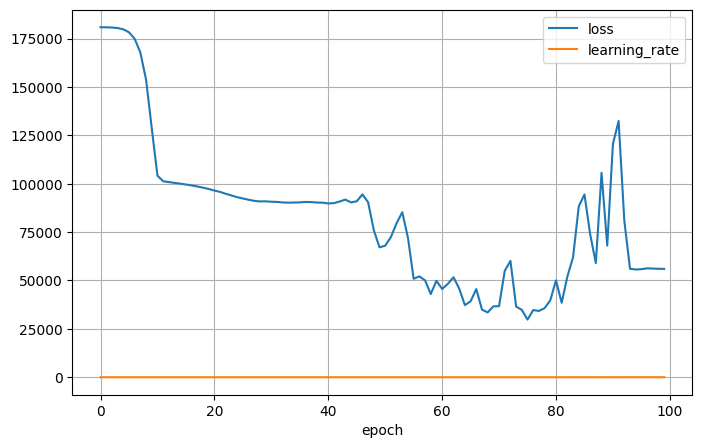

In [11]:
# ploting
pd.DataFrame(history.history).plot(figsize=(8, 5), xlabel='epoch')
plt.grid(True)
plt.show()

Text(0, 0.5, 'loss')

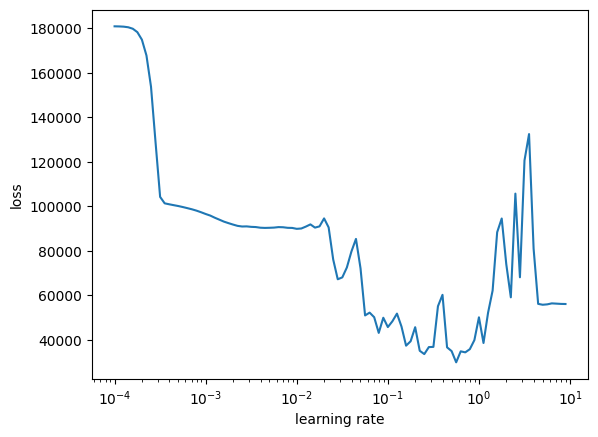

In [12]:
# plotting the learning rate vs loss
lrs = 1e-4 * (10 ** (np.arange(100) / 20))
plt.semilogx(lrs, history.history['loss'])
plt.xlabel('learning rate')
plt.ylabel('loss')

Using above obersations we can say that the most optimal leaning rate for our model is 0.014125.
<br>Note: This observation may varry durring re-runs of the code blocks but I have recorded the most consistant observation value which gives us optimal most minimal loss values durring fitting.

In [13]:
# making a linear regression model with most optimal parameters for our dataset
model_1 = tf.keras.Sequential({
    tf.keras.layers.Dense(303, activation='relu'),
    tf.keras.layers.Dense(203, activation='relu'),
    tf.keras.layers.Dense(135, activation='relu'),
    tf.keras.layers.Dense(90, activation='relu'),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(1)
})

In [14]:
# compiling our new model with the optimal learning rate
model_1.compile(loss=tf.keras.losses.MAE, optimizer=tf.keras.optimizers.Adam(0.014125))

In [15]:
# fitting our model with training data for 150 epochs
history_1 = model_1.fit(trainingX, trainingY, epochs=150)

Epoch 1/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 119734.7109
Epoch 2/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 79577.1484
Epoch 3/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 78088.5547
Epoch 4/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 81766.7891
Epoch 5/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 80861.3047
Epoch 6/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 76026.9219
Epoch 7/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 78956.3125
Epoch 8/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 80106.0000
Epoch 9/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 80018.4453
Epoch 10/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 78853.7734
Epoch 11/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 83927.9531
Epoch 12/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 81868.2891
Epoch 13/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 76872.7188
Epoch 14/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 75946.1484
Epoch 15/150
4

In [16]:
# loading in the test dataset as dataframe
df1 = pd.read_csv('https://raw.githubusercontent.com/atharv-d21/regression_house_price/refs/heads/main/Data/test.csv')
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [17]:
# filling the null values with zeros
df1.fillna(0)
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [18]:
# one-hot encoding the test dataframe
df1 = pd.get_dummies(df1)
df1

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,False,False,False,True,False,False,False,False,True,False
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,False,False,False,True,False,False,False,False,True,False
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,False,False,False,True,False,False,False,False,True,False
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,False,False,False,True,False,False,False,False,True,False
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,False,False,False,True,False,False,False,False,True,False
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,False,False,False,True,True,False,False,False,False,False
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,False,False,False,True,True,False,False,False,False,False
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,False,False,False,True,False,False,False,False,True,False


In [19]:
# replacing all true and false values with 1s and 0s respectively
df1.replace({True: 1, False: 0}, inplace=True)
df1

/tmp/ipython-input-3320070494.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.replace({True: 1, False: 0}, inplace=True)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,0,0,1,1,0,0,0,0,0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,0,0,0,1,1,0,0,0,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0,0,0,1,0,0,0,0,1,0


In [20]:
# recording Ids before dropping them
ids = df1['Id']

In [21]:
# adding missing features from training dataframe
# Get missing columns in df1
missing_cols = set(trainingX.columns) - set(df1.columns)

# Add a missing column in df1 with default value of 0
for c in missing_cols:
    df1[c] = 0

# Ensure the order of column in df1 is the same as trainingX
df1 = df1[trainingX.columns]
df1

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,1,0,0,0,0,1,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [22]:
# making prediction on our testing dataframe
prediction = model_1.predict(df1)
prediction = pd.DataFrame(prediction)
prediction = prediction.fillna(180000)
prediction

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,129880.265625,0.0,129719.742188,129736.507812,0.0,129706.773438,129710.320312,129741.531250,0.0,129745.742188,...,129612.328125,129634.187500,129625.804688,129577.359375,0.0,129746.445312,129767.570312,129650.195312,0.0,129752.062500
1,120372.132812,0.0,120223.289062,120238.851562,0.0,120211.289062,120214.617188,120243.585938,0.0,120247.492188,...,120123.828125,120144.070312,120136.265625,120091.187500,0.0,120248.101562,120267.742188,120158.867188,0.0,120253.328125
2,182801.750000,0.0,182576.156250,182599.734375,0.0,182558.000000,182562.734375,182606.375000,0.0,182612.265625,...,182424.578125,182455.437500,182443.765625,182376.609375,0.0,182613.562500,182642.968750,182478.125000,0.0,182621.265625
3,187909.187500,0.0,187677.296875,187701.546875,0.0,187658.656250,187663.484375,187708.343750,0.0,187714.406250,...,187521.468750,187553.218750,187541.203125,187472.250000,0.0,187715.734375,187745.937500,187576.531250,0.0,187723.656250
4,176688.468750,0.0,176470.359375,176493.171875,0.0,176452.828125,176457.421875,176499.625000,0.0,176505.328125,...,176323.906250,176353.750000,176342.421875,176277.437500,0.0,176506.546875,176535.000000,176375.625000,0.0,176514.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,180000.000000,180000.0,180000.000000,180000.000000,180000.0,180000.000000,180000.000000,180000.000000,180000.0,180000.000000,...,180000.000000,180000.000000,180000.000000,180000.000000,180000.0,180000.000000,180000.000000,180000.000000,180000.0,180000.000000
1455,88083.625000,0.0,87974.492188,87985.890625,0.0,87965.632812,87968.257812,87989.625000,0.0,87992.507812,...,87901.976562,87916.710938,87910.937500,87877.250000,0.0,87992.757812,88007.351562,87927.429688,0.0,87996.718750
1456,176392.109375,0.0,176174.390625,176197.140625,0.0,176156.859375,176161.468750,176203.609375,0.0,176209.281250,...,176028.156250,176057.953125,176046.656250,175981.765625,0.0,176210.515625,176238.906250,176079.812500,0.0,176217.937500
1457,180000.000000,180000.0,180000.000000,180000.000000,180000.0,180000.000000,180000.000000,180000.000000,180000.0,180000.000000,...,180000.000000,180000.000000,180000.000000,180000.000000,180000.0,180000.000000,180000.000000,180000.000000,180000.0,180000.000000


In [23]:
# converting prediction into a 1D array
prediction = prediction.to_numpy().flatten()
prediction

array([129880.266,      0.   , 129719.74 , ..., 209467.55 ,      0.   ,
       209631.77 ], dtype=float32)

In [25]:
submission = pd.DataFrame({
    'Id': ids,
    'SalePrice': prediction[:len(ids)]
})
submission

,Id,SalePrice
0,1461,129880.265625
1,1462,0.000000
2,1463,129719.742188
3,1464,129736.507812
4,1465,0.000000
...,...,...
1454,2915,182290.109375
1455,2916,182347.671875
1456,2917,182353.046875
1457,2918,181972.937500


In [26]:
# exporting our submission in csv file format
submission.to_csv('submission.csv', index=False)

After looking back at my first ML model after learning and improving my knowledge on the topic for about an year and half or so, I notice the following:

1. No data preprocessing
2. No use of Hyperparameters, eventhough I used hyperparameter tuning
3. Use of only one baseline model

How I would redo this same project:

1. Process the training and testing data together
2. Use data pre-processing
3. Use multiple models (like LGBRegressor, XGBoost etc.) to get better comparision with my basic tensorflow model.